<a href="https://colab.research.google.com/github/shrutivarade/CS680-OODP/blob/main/Copy_of_CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

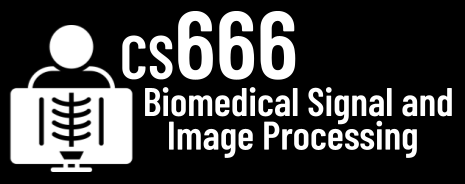

# Assignment 1

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (10pts): Install the BioSPPY library with the following code.

In [ ]:
!pip install biosppy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 1.5 MB/s eta 0:00:00


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [ ]:
#Download the dataset and upload it to ecg.txt file
import requests
url = "https://cs666.org/data/ecg.txt"
r = requests.get(url, allow_redirects=True)
open("ecg.txt", "w").write(r.text)


105085

In [ ]:
#Load the dataset using biospy library
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

In [ ]:
signal

array([2044., 2044., 2044., ..., 2044., 2045., 2043.])

In [ ]:
metadata

{'sampling_rate': 1000.0, 'resolution': 12, 'labels': ['ECG']}

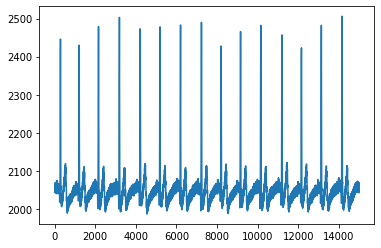

In [ ]:
plt.plot(signal) # plot the entire ecg signal

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [ ]:
SAMPLING_RATE = metadata['sampling_rate'] #1000 ### TODO! Samples per second, it is given in ecg.text
n = len(signal) # number of samples
SECONDS = (n)/SAMPLING_RATE  #1/1000 ### TODO!

print(SAMPLING_RATE)
print(n)
print(SECONDS)

1000.0
15000
15.0


**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [ ]:
###TODO - filter signal using Biosppy

from biosppy.signals import ecg
out_ecg = ecg.ecg(signal=signal, sampling_rate=SAMPLING_RATE, show=False)

# Show = true, asks for tKinter
# keep show=false

out_ecg

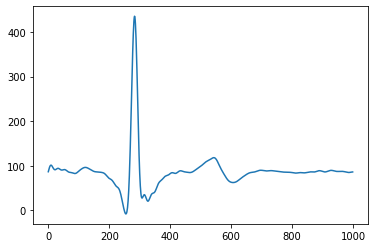

In [ ]:
plt.plot(out_ecg['filtered'][0:1000])

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

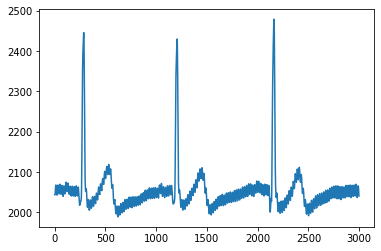

In [ ]:
### TODO plot unfiltered signal
plt.plot(signal[0:int(3*SAMPLING_RATE)])

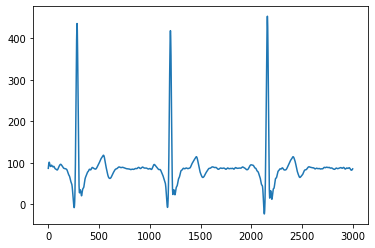

In [ ]:
### TODO plot filtered signal 
plt.plot(out_ecg['filtered'][0:int(3*SAMPLING_RATE)])

Yes, I can spot the P, Q, R, S, T waves.

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

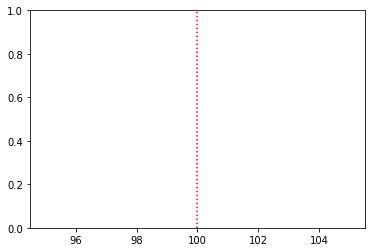

In [ ]:
plt.axvline(x = 100, color = 'r', ls=':')

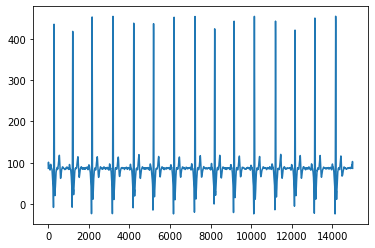

In [ ]:
### TODO
plt.plot(out_ecg['filtered'])

In [ ]:
r_peaks = out_ecg['rpeaks']
r_peaks

array([  283,  1204,  2159,  3188,  4211,  5188,  6200,  7232,  8200,
        9157, 10156, 11198, 12159, 13139, 14162])

Text(0.5, 0, 'time [s]')

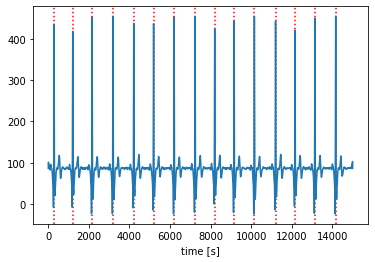

In [ ]:
# plt.axvline(x = 283, color = 'r', ls=':') 

for rpeak in r_peaks:
  plt.axvline(x = rpeak, color = 'r', ls=':')


plt.plot(out_ecg['filtered'])

plt.xlabel('time [s]')

# plt.xlim(0,500)

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [ ]:
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.2 MB/s eta 0:00:00


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal? --- yes
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

In [ ]:
# TODO Does the detection work well?
# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(signal, r_peaks, sampling_rate=1000, method="peak")

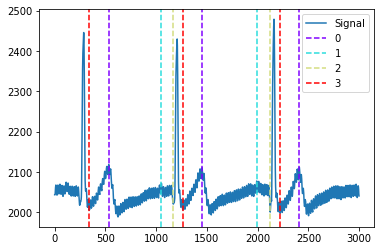

In [ ]:
# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3], 
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]], signal[0:int(3*SAMPLING_RATE)])

Yes, the detection work good enough.

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal

In [ ]:
_, waves_peak_unfiltered = nk.ecg_delineate(signal, r_peaks, sampling_rate=1000, method="peak") #Unfiltered Signal

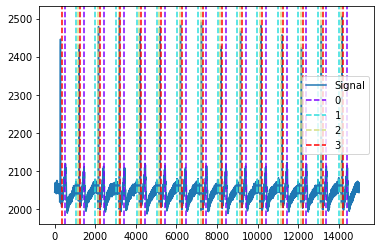

In [ ]:
# plot = nk.events_plot([waves_peak_unfiltered['ECG_T_Peaks'][:3], 
#                        waves_peak_unfiltered['ECG_P_Peaks'][:3],
#                        waves_peak_unfiltered['ECG_Q_Peaks'][:3],
#                        waves_peak_unfiltered['ECG_S_Peaks'][:3]], signal[0:3000])

plot = nk.events_plot([waves_peak_unfiltered['ECG_T_Peaks'][:n], 
                       waves_peak_unfiltered['ECG_P_Peaks'][:n],
                       waves_peak_unfiltered['ECG_Q_Peaks'][:n],
                       waves_peak_unfiltered['ECG_S_Peaks'][:n]], signal)

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

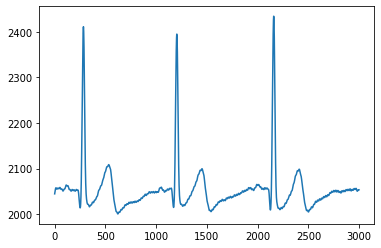

In [ ]:
nk_filter_high = nk.signal_filter(signal, sampling_rate = SAMPLING_RATE, highcut=30)  
plt.plot(nk_filter_high[0:3000])

In [ ]:
nk_filter_high

array([2043.89704207, 2045.07847417, 2046.23536157, ..., 2050.57533411,
       2050.09328867, 2049.64867945])

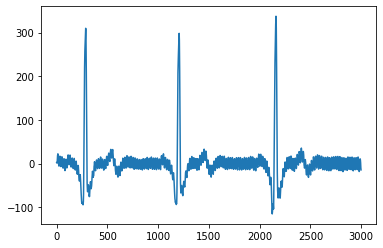

In [ ]:
nk_filter_low = nk.signal_filter(signal, sampling_rate = SAMPLING_RATE, lowcut=5)
plt.plot(nk_filter_low[0:3000])

In [ ]:
nk_filter_low

array([ 3.48923499,  3.32713321,  3.16460853, ..., 18.83225425,
       20.45304702, 19.07999751])

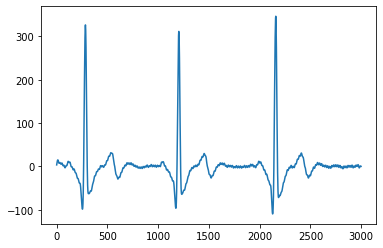

In [ ]:
nk_filter = nk.signal_filter(signal, sampling_rate = SAMPLING_RATE, lowcut=4, highcut=35) # filter the signal using Neurokit2 and Bandpass filter.
plt.plot(nk_filter[0:3000])

In [ ]:
nk_filter

array([ 3.70123602,  5.19296097,  6.65344042, ..., 13.38621614,
       12.13249452, 10.83280187])

In [ ]:
_, waves_peak_filtered = nk.ecg_delineate(nk_filter, r_peaks, sampling_rate=1000, method="peak")

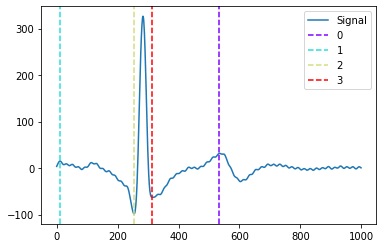

In [ ]:
plot = nk.events_plot([waves_peak_filtered['ECG_T_Peaks'][:1], 
                       waves_peak_filtered['ECG_P_Peaks'][:1],
                       waves_peak_filtered['ECG_Q_Peaks'][:1],
                       waves_peak_filtered['ECG_S_Peaks'][:1]], nk_filter[0:1000])



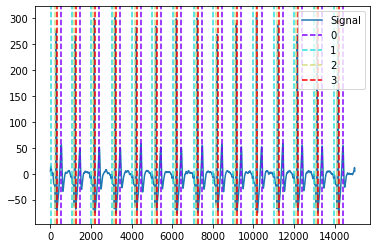

In [ ]:
plot = nk.events_plot([waves_peak_filtered['ECG_T_Peaks'][:n], 
                       waves_peak_filtered['ECG_P_Peaks'][:n],
                       waves_peak_filtered['ECG_Q_Peaks'][:n],
                       waves_peak_filtered['ECG_S_Peaks'][:n]], nk_filter) 

In [ ]:
# Finally, run the delineation on the filtered signal from BioSPPY.

In [ ]:
_, waves_peak_filtered = nk.ecg_delineate(out_ecg['filtered'], r_peaks, sampling_rate=1000, method="peak")

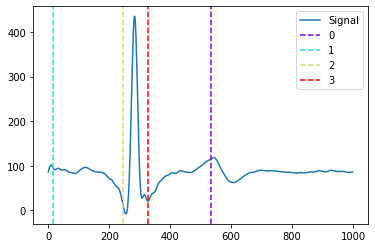

In [ ]:
plot = nk.events_plot([waves_peak_filtered['ECG_T_Peaks'][:1], 
                       waves_peak_filtered['ECG_P_Peaks'][:1],
                       waves_peak_filtered['ECG_Q_Peaks'][:1],
                       waves_peak_filtered['ECG_S_Peaks'][:1]], out_ecg['filtered'][0:1000])

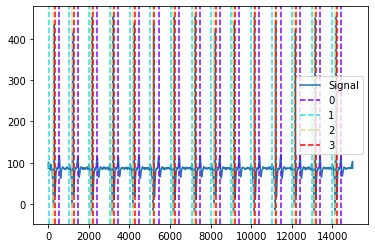

In [ ]:
plot = nk.events_plot([waves_peak_filtered['ECG_T_Peaks'][:n], 
                       waves_peak_filtered['ECG_P_Peaks'][:n],
                       waves_peak_filtered['ECG_Q_Peaks'][:n],
                       waves_peak_filtered['ECG_S_Peaks'][:n]], out_ecg['filtered'])

In [ ]:
# TODO Which one works the best?

The filtered signal generated using Biosppy library is sharp and precise compared to the one generated using Neurokit2 library.

Therefore, the detection of peaks P, Q, S, T using nk.ecg_delineate is highly accurate for the filtered signal plotted using Biosppy Library.


In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#         '(  (..-'
#            '-'
#